In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
wc = pd.read_csv('WorldCupMatches.csv')
wc.dropna(how='all',inplace=True)
all_finals = wc.groupby('Stage').get_group('Final')

a = (all_finals['Year'],all_finals['Home Team Name'],all_finals['Home Team Goals'],all_finals['Away Team Goals'],all_finals['Away Team Name'])



In [3]:

Winner = []
Runner_up = []
for Year,Home,hGoals,aGoals,Away in zip(*a):
    if(hGoals == aGoals):
        conditions = all_finals.groupby('Year').get_group(Year)['Win conditions']
        for i in conditions:
            winner = i.split()[0]
            if(winner == Home):
                Winner.append(Home)
            else:
                Runner_up.append(Away)
    elif(hGoals > aGoals):
        Winner.append(Home)
        Runner_up.append(Away)
    elif(aGoals > hGoals):
        Winner.append(Away)
        Runner_up.append(Home)

In [4]:
del Winner[-1]
del Runner_up[-1]


In [5]:
from collections import Counter
for i in range(len(Winner)):
    if(Winner[i] == 'Germany FR'):
        del Winner[i]
        Winner.append('Germany')
for i in range(len(Runner_up)):
    if(Runner_up[i] == 'Germany FR'):
        del Runner_up[i]
        Runner_up.append('Germany')

In [6]:
win_count = Counter(Winner)
lose_count = Counter(Runner_up)
x = []
y = []
y2 = []
for name,win in win_count.most_common():
    x.append(name)
    y.append(win)
    y2.append(lose_count[name])
    

world = pd.DataFrame({'Winner':y,'Runner_up':y2},index=x)


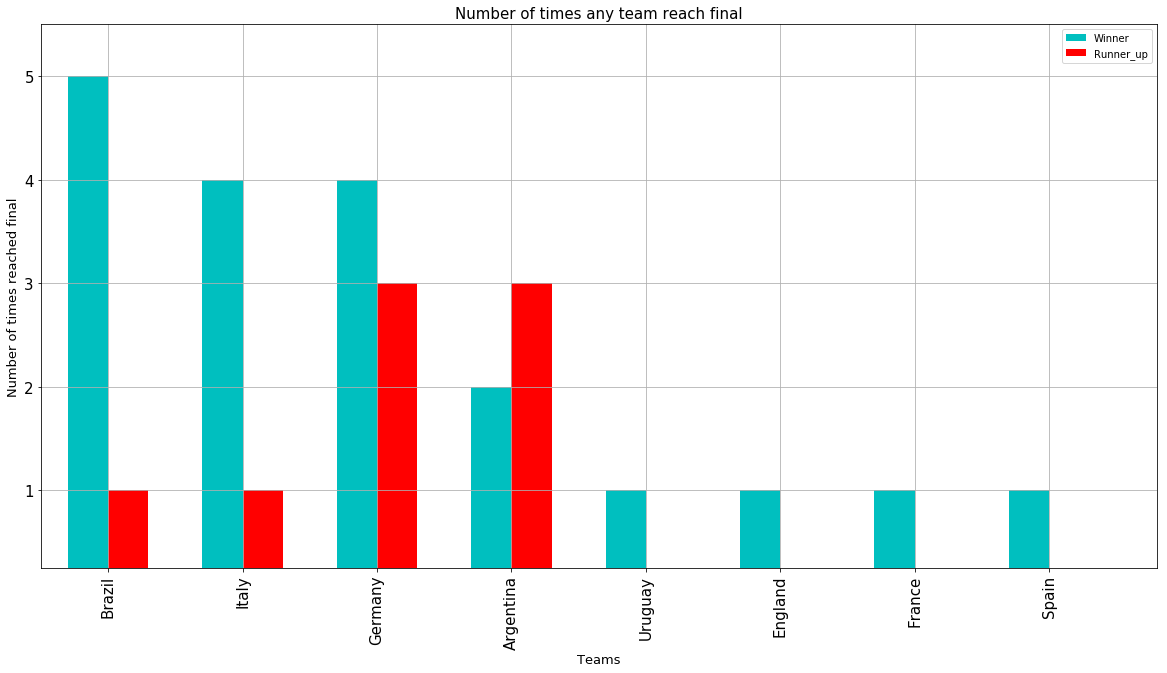

In [7]:
ax = world.Winner.plot(kind='bar',grid=True,width=-0.3,align='edge',color='c',legend=True,figsize=(20,10),fontsize=15)
ax = world.Runner_up.plot(kind='bar',grid=True,width=0.3,color='r',align='edge',legend=True)
x0 , x1, y0 , y1= plt.axis()

plt.axis((x0 - 0.25,x1+0.25,y0+0.25,y1+0.25))
# plt.rcParams.update({'font-size':15})


plt.ylabel("Number of times reached final",fontsize=13)
plt.xlabel("Teams",fontsize=13)
plt.title('Number of times any team reach final',fontsize=15,)
plt.show()

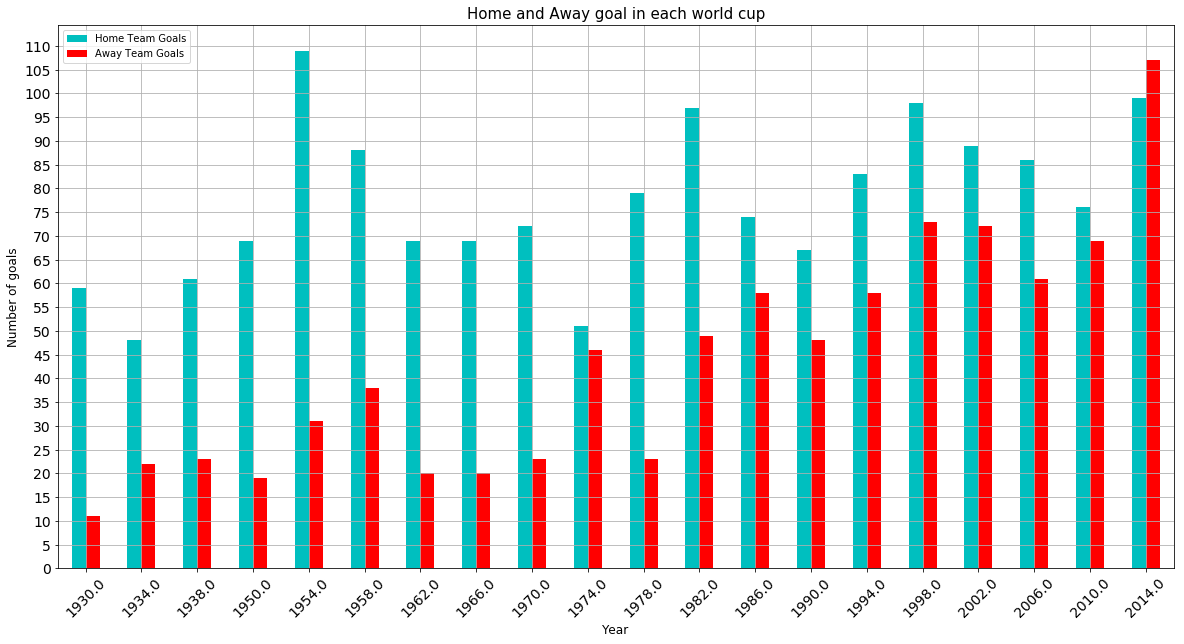

In [8]:
groubYear = wc.groupby('Year')
a = groubYear['Home Team Goals','Away Team Goals'].sum()
a.plot(y = ['Home Team Goals','Away Team Goals'],kind='bar',color=['c','r'],figsize=(20,10),fontsize=14,grid=True)
plt.xticks(rotation=45)
plt.yticks(range(0,111,5))
plt.xlabel('Year',fontsize=12)
plt.ylabel('Number of goals',fontsize=12)
plt.title('Home and Away goal in each world cup',fontsize=15)
plt.show()

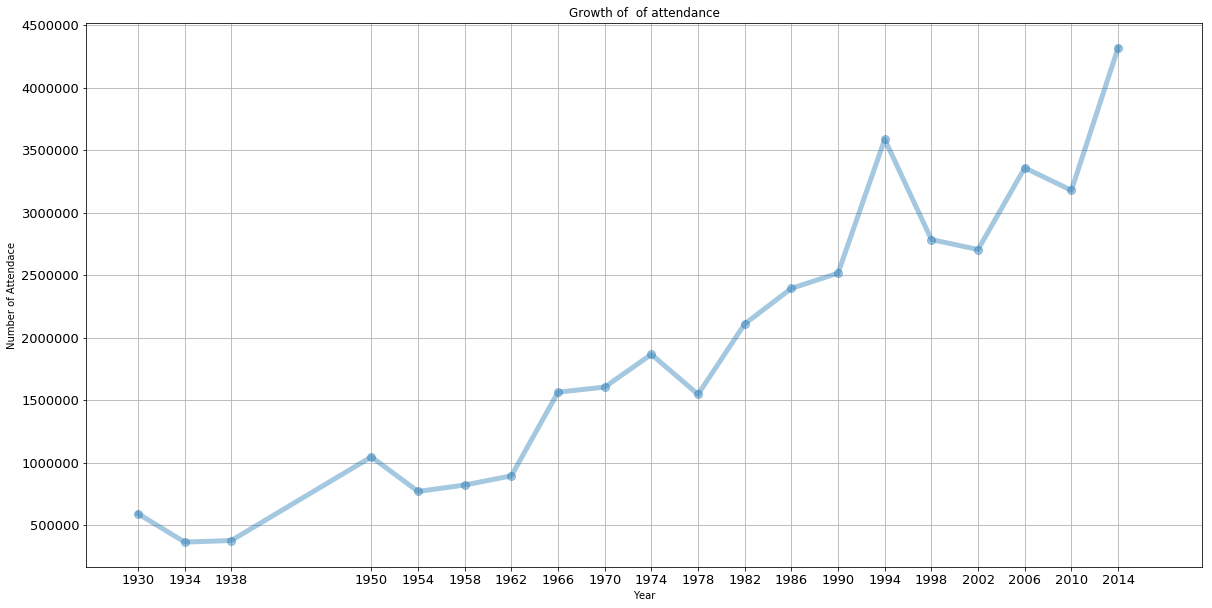

In [9]:
attendence = groubYear['Attendance'].sum()
attendence.plot(y=['Attendance'],linestyle='solid',marker='o' ,figsize=(20,10),grid=True,linewidth=5,markersize=8,alpha=0.4,fontsize=13)
plt.xticks(attendence.index)
x0,x1,y0,y1 = plt.axis()
plt.title("Growth of  of attendance")
plt.ylabel("Number of Attendace")
plt.xlabel("Year")

plt.axis((x0 - 0.25,x1 + 3,y0,y1))
plt.show()

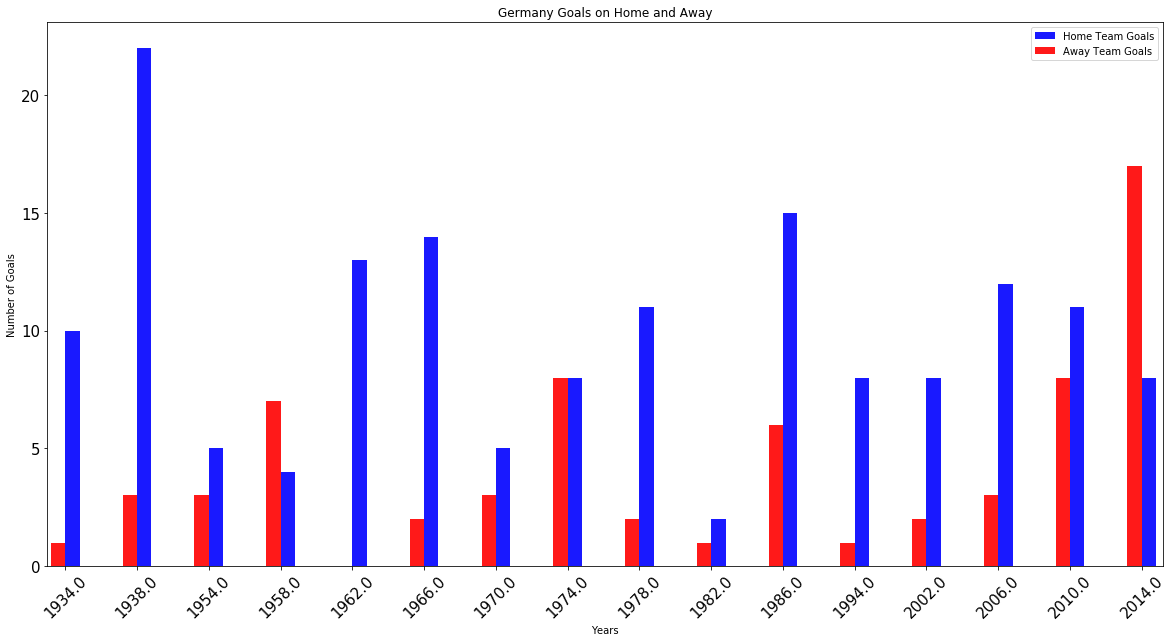

In [10]:
home_germany_goals = wc.groupby("Home Team Name").get_group('Germany')[['Year','Home Team Goals']]
home_germany_goals2 = wc.groupby("Home Team Name").get_group('Germany FR')[['Year','Home Team Goals']]

away_germany_goals = wc.groupby('Away Team Name').get_group('Germany')[['Year','Away Team Goals']]
away_germany_goals2 = wc.groupby('Away Team Name').get_group('Germany FR')[['Year','Away Team Goals']]

away_goals = away_germany_goals.groupby('Year')['Away Team Goals'].sum()
away_goals2 = away_germany_goals2.groupby('Year')['Away Team Goals'].sum()
away_goals = pd.concat([away_goals,away_goals2])

goals = home_germany_goals.groupby('Year')['Home Team Goals'].sum()
goals2 = home_germany_goals2.groupby('Year')['Home Team Goals'].sum()
goals = pd.concat([goals,goals2])

goals.sort_index(inplace=True)
away_goals.sort_index(inplace=True)
goals.plot(kind='bar',color='b',figsize=(20,10) ,width=0.2,align='edge',fontsize=15,alpha=0.9,legend=True)
away_goals.plot(kind='bar',color='r',width=-0.2,align='edge', alpha=0.9,legend=True)

x0,x1,y0,y1 = plt.axis()

plt.axis((x0,x1 + 0.25, y0 , y1))
plt.xticks(rotation=45)
plt.ylabel("Number of Goals")
plt.xlabel("Years")
plt.title("Germany Goals on Home and Away")

plt.show()



In [29]:
wc.dropna(subset=['Attendance'],inplace=True)
mCommon = wc.sort_values(by='Attendance').tail(10)
n = mCommon.head(10)[['Home Team Name','Away Team Name','Stadium','Attendance','Datetime']]
n.replace(to_replace='Maracan� - Est�dio Jornalista M�rio Filho',value='Marancan Stadium',inplace=True)
n.replace(to_replace='Germany FR',value='Germany',inplace=True)
annotion = list('Stadium: '+n['Stadium'] + ' ' + n['Datetime'])


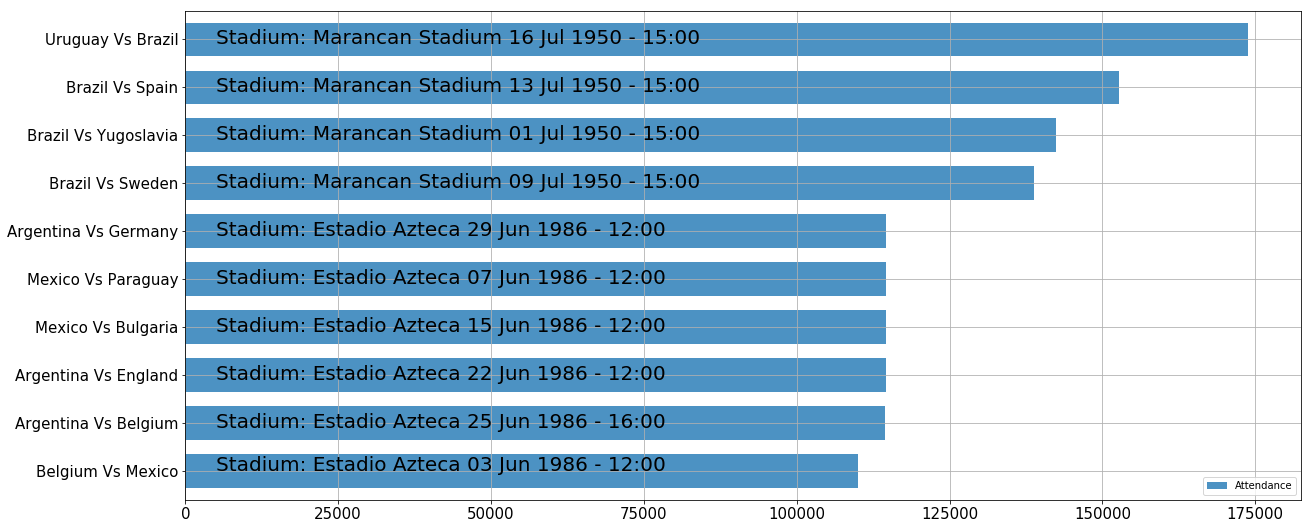

In [30]:
ticks = n.get('Home Team Name') + ' Vs ' +  n.get("Away Team Name")
bar = n.plot(y=['Attendance'],kind='barh',figsize=(20,9),fontsize=15,width=0.7,grid=True,alpha=0.8)
plt.yticks(range(10),list(ticks))

for i in range(1,10):
    plt.text(5000,0.9 + (i-1),annotion[i],fontsize=20)

plt.text(5000,0,annotion[0],fontsize=20)
plt.show()
